In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
vocab_size = 10000
max_length = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 156ms/step - accuracy: 0.6818 - loss: 0.5726 - val_accuracy: 0.8684 - val_loss: 0.3267
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 158ms/step - accuracy: 0.8971 - loss: 0.2632 - val_accuracy: 0.8594 - val_loss: 0.3341
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 79s 149ms/step - accuracy: 0.9285 - loss: 0.1942 - val_accuracy: 0.8592 - val_loss: 0.3633
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 155ms/step - accuracy: 0.9438 - loss: 0.1542 - val_accuracy: 0.8608 - val_loss: 0.3409
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 156ms/step - accuracy: 0.9579 - loss: 0.1213 - val_accuracy: 0.8686 - val_loss: 0.3858


In [7]:
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8528 - loss: 0.4157

Test Accuracy: 0.8544


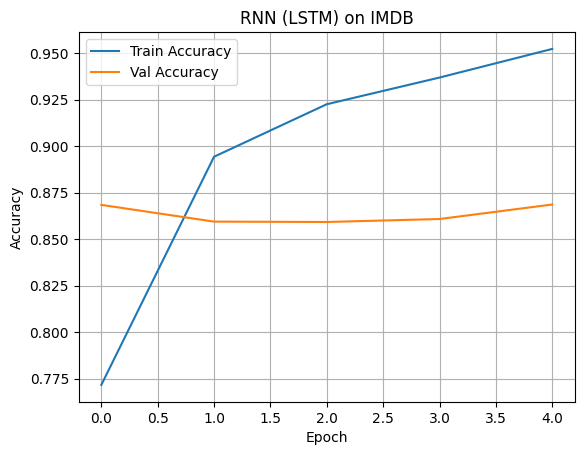

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("RNN (LSTM) on IMDB")
plt.legend()
plt.grid(True)
plt.show()